[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
0.9066666666666666


/home/hnx/.local/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


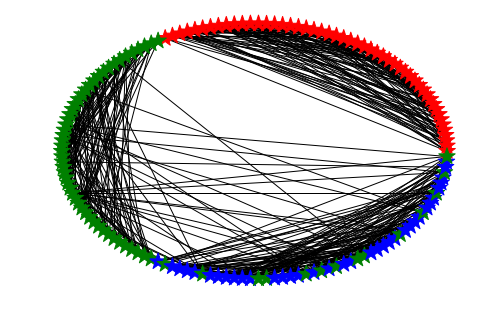

In [94]:
#姓名：霍宁肖
#学号：2016011504
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from math import sqrt
import operator as opt
from sklearn.cluster import KMeans

from sklearn import datasets
iris=datasets.load_iris()
x=iris.data
y=iris.target


#利用KNN获得相似度矩阵
def getWbyKNN(x,k):
    n=len(x)
    #初始化距离矩阵和相似度矩阵
    dis_matrix=np.zeros((n,n))
    w=np.zeros((n,n))
    #距离矩阵为对称矩阵
    for i in range(n):
        for j in range(i+1,n):
            dis_matrix[i][j]=dis_matrix[j][i]=np.sqrt(np.sum((x[i]-x[j])**2))
            #def dist(vec1,vec2):   return np.sqrt(np.sum((vec1-vec2)**2))
    #对距离矩阵进行遍历，可以取出每一行
    for idx,each in enumerate(dis_matrix):
        index_array=np.argsort(each)#返回从小到大排序后的下标
        w[idx][index_array[1:k+1]]=1   #除自己外的前k个，由于距离很近，相似度赋值为1
    tmp_w=np.transpose(w)
    w=(tmp_w+w)/2
    return w
#算出每个节点的度数，得到度矩阵D,对角线元素为每一行之和
def getD(w):
    n=len(w)
    D=np.diag(np.zeros(n))
    for i in range(n):
        D[i][i]=sum(w[i])
    return D
#拉普拉斯矩阵L=D-W
#获得拉普拉斯矩阵L的特征矩阵,用内置函数
def getEigVec(L,cluster_num):
    eigval,eigvec=np.linalg.eig(L)
    dim=len(eigval)
    dictEigval=dict(zip(eigval,range(0,dim)))
    kEig=np.sort(eigval)[0:cluster_num]
    ix=[dictEigval[k] for k in kEig]
    return eigval[ix],eigvec[:,ix]
#获得特征矩阵之后，使用kmeans方法来对特征矩阵进行聚类，每个特征向量是特征矩阵的列
#把每行当成一个聚类样本数据，这样聚类就是最终结果，调用sklearn中的KMeans函数

w=getWbyKNN(x,5)
D=getD(w)
L=D-w
clf=KMeans(n_clusters=3,random_state=1)############随机打乱，类别不会变化

eigval,eigvec=getEigVec(L,3)
s=clf.fit(eigvec)
#根据邻接矩阵产生的聚类结果
C=s.labels_
#print(y)
print(C)


#计算正确率
count=0
for k in range(150):
    if C[k]==y[k]:
        count=count+1
acc=float(count)/float(len(y))
print(acc)


#聚类结果可视化，转化为图的形式
G=nx.Graph()
point=[i for i in range(150)]#####point由i组成，i从0到149
G.add_nodes_from(point)
edglist=[]
for i in range(150):
    for j in range(150):
        if w[i][j]>0:
            edglist.append((i,j))#####如果两点之间相似度不为0就添加一条边
G=nx.Graph(edglist)

colorlist=[]
for i in range(150):
    if(C[i]==0):
        colorlist.append('r')
    elif(C[i]==1):
        colorlist.append('g')
    else:
        colorlist.append('b')
nx.draw(G,pos = nx.circular_layout(G),node_color = colorlist,with_labels = False,node_shape='*',)
plt.show()

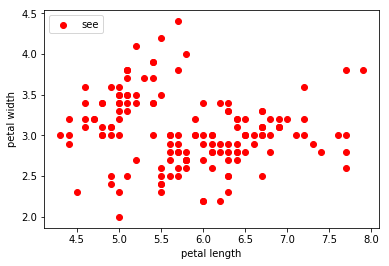

In [3]:
#对原始数据集进行画图
from sklearn import datasets
iris=datasets.load_iris()
x=iris.data
y=iris.target
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1],c="red",marker='o',label='see')
plt.xlabel('petal length')#x轴名字
plt.ylabel('petal width') #y轴名字
plt.legend(loc=2)         
plt.show()